In [3]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from librosa import display
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
import tensorflow.keras.layers as layers
import IPython.display as ipd
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import keras

In [4]:
import pandas as pd
data=pd.read_csv("D:\\shravanne-tasks\\Datasets\\UrbanSound8K\\metadata\\UrbanSound8K.csv")
data.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


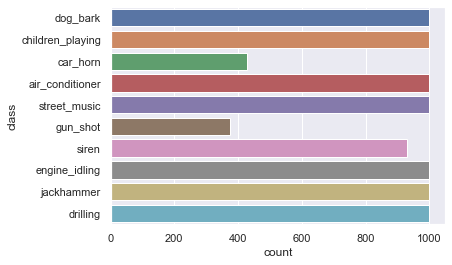

In [5]:
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(y= data['class'],orient='v')
plt.show()

In [6]:
import librosa
audio_file_path="D:\\shravanne-tasks\\Datasets\\UrbanSound8K\\audio\\fold5\\100263-2-0-3.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

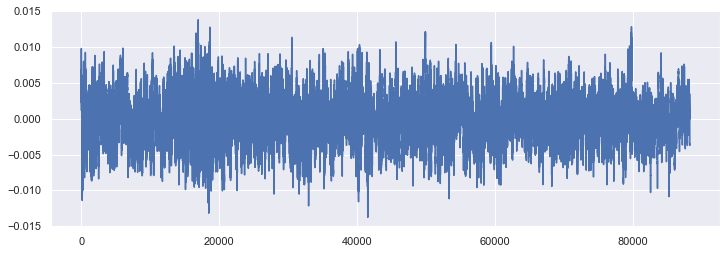

In [7]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [8]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

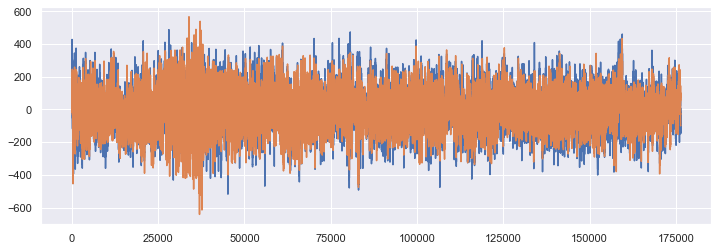

In [9]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [10]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [11]:
mfccs

array([[-4.76983704e+02, -4.54081116e+02, -4.52210968e+02, ...,
        -4.80044495e+02, -4.75459564e+02, -4.91704163e+02],
       [ 1.18308380e+02,  1.15959885e+02,  1.15713654e+02, ...,
         1.15763275e+02,  1.13561340e+02,  1.04188065e+02],
       [-2.13244038e+01, -2.91875744e+01, -3.47086411e+01, ...,
        -1.28605833e+01, -1.20376625e+01, -5.69748783e+00],
       ...,
       [-2.17649674e+00, -2.13805175e+00, -4.00922680e+00, ...,
         3.15195084e-01,  3.51473784e+00,  7.31593561e+00],
       [-1.06117499e+00, -1.59224272e+00, -1.59618700e+00, ...,
        -5.39945841e-01,  9.07175303e-01,  2.92428374e+00],
       [-6.15000844e-01,  1.59921479e+00,  7.02612019e+00, ...,
        -2.00688767e+00, -5.01438046e+00, -3.42770672e+00]], dtype=float32)

In [12]:
import pandas as pd
import os
import librosa

audio_dataset_path='D:\\shravanne-tasks\\Datasets\\UrbanSound8K\\audio'


In [13]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [14]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(data.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [16:28,  5.40it/s]C:\Users\ril\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8326it [34:19, 12.37it/s]C:\Users\ril\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\ril\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [35:28,  4.10it/s]


In [15]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.52066, 52.00812, -...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [16]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [17]:
X.shape

(8732, 40)

In [18]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [19]:
y.shape

(8732, 10)

In [20]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665213e+00, -1.36902380e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305033e+00, -5.27745247e+00, -1.55697155e+00],
       [-4.98715439e+01,  2.65352815e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920465e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641389e-01,  7.33490825e-01,  7.11009204e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155182e+01, ...,
         1.46811938e+00, -2.00916982e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886786e+00, -3.37136054e+00, -1.56651187e+00]], dtype=float32)

In [22]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
X_train.shape

(6985, 40)

In [24]:
X_test.shape

(1747, 40)

In [25]:
y_train.shape

(6985, 10)

In [26]:
y_test.shape

(1747, 10)

In [27]:
X_train=np.reshape(X_train,(X_train.shape[0],10,4,1))
X_test=np.reshape(X_test,(X_test.shape[0],10,4,1))

In [28]:
INPUTSHAPE = (10,4,1)

In [29]:
model = Sequential([
    
                          layers.Conv2D(32 , (3,3),activation = 'relu',padding='valid', input_shape = INPUTSHAPE),  
                          layers.MaxPooling2D(2, padding='same'),
                          #layers.Conv2D(128, (3,3), activation='relu',padding='valid'),
                          #layers.MaxPooling2D(2, padding='same'),
                          #layers.Dropout(0.3),
                          #layers.Conv2D(128, (3,3), activation='relu',padding='valid'),
                          #layers.MaxPooling2D(2, padding='same'),
                          #layers.Dropout(0.3),
                          #layers.GlobalAveragePooling2D(),
                          layers.Flatten(),
                          layers.Dense(512 , activation = 'relu'),
                          layers.Dense(10 , activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'acc')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 2, 32)          320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 1, 32)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 512)               66048     
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 71,498
Trainable params: 71,498
Non-trainable params: 0
____________________________________________________

In [31]:
batch_size = 8
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=8, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False)
#checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                             # verbose=1, save_best_only=True)
history = model.fit(X_train,y_train ,validation_data=(X_test,y_test),
            epochs=40,
            callbacks = [callback],batch_size=batch_size)

Epoch 1/40
874/874 [==============================] - 6s 7ms/step - loss: 0.1754 - acc: 0.9476 - val_loss: 0.6523 - val_acc: 0.8672
Epoch 2/40
874/874 [==============================] - 6s 7ms/step - loss: 0.0986 - acc: 0.9691 - val_loss: 0.5223 - val_acc: 0.8821
Epoch 3/40
874/874 [==============================] - 6s 7ms/step - loss: 0.0931 - acc: 0.9678 - val_loss: 0.5210 - val_acc: 0.8855
Epoch 4/40
874/874 [==============================] - 7s 8ms/step - loss: 0.1001 - acc: 0.9675 - val_loss: 0.5647 - val_acc: 0.8890
Epoch 5/40
874/874 [==============================] - 7s 8ms/step - loss: 0.1163 - acc: 0.9618 - val_loss: 0.8844 - val_acc: 0.8517
Epoch 6/40
874/874 [==============================] - 5s 6ms/step - loss: 0.1107 - acc: 0.9635 - val_loss: 0.6877 - val_acc: 0.8689
Epoch 7/40
874/874 [==============================] - 5s 6ms/step - loss: 0.0594 - acc: 0.9787 - val_loss: 0.5930 - val_acc: 0.8918
Epoch 8/40
874/874 [==============================] - 4s 4ms/step - loss: 0.

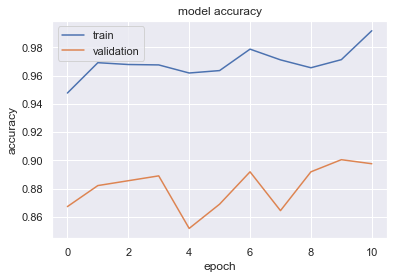

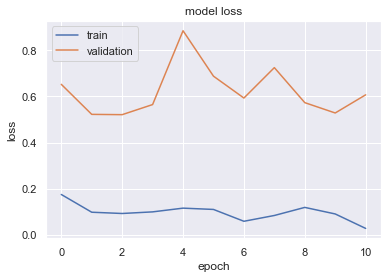

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [33]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8975386619567871


In [34]:
y_pred=model.predict(X_test)

55/55 [==============================] - 1s 6ms/step


In [35]:
round_off=np.round_(y_pred)

Confusion Matrix
[[189   1   3   0   0   0   0   0   1   1]
 [  1  82   0   1   0   1   0   1   0   5]
 [  3   1 174   3   2   3   1   0   2  16]
 [  2   0   8 150   4   4   0   0   7   7]
 [  3   1   1   3 190   0   0   1   0   3]
 [  0   1   2   0   0 209   0   0   2   2]
 [  3   0   7   1   1   2  69   0   2   2]
 [  5   3   0   0  14   2   0 158   1   4]
 [  0   0   5   1   1   3   0   0 186   3]
 [  3   4   9   1   3   3   0   1   1 158]]


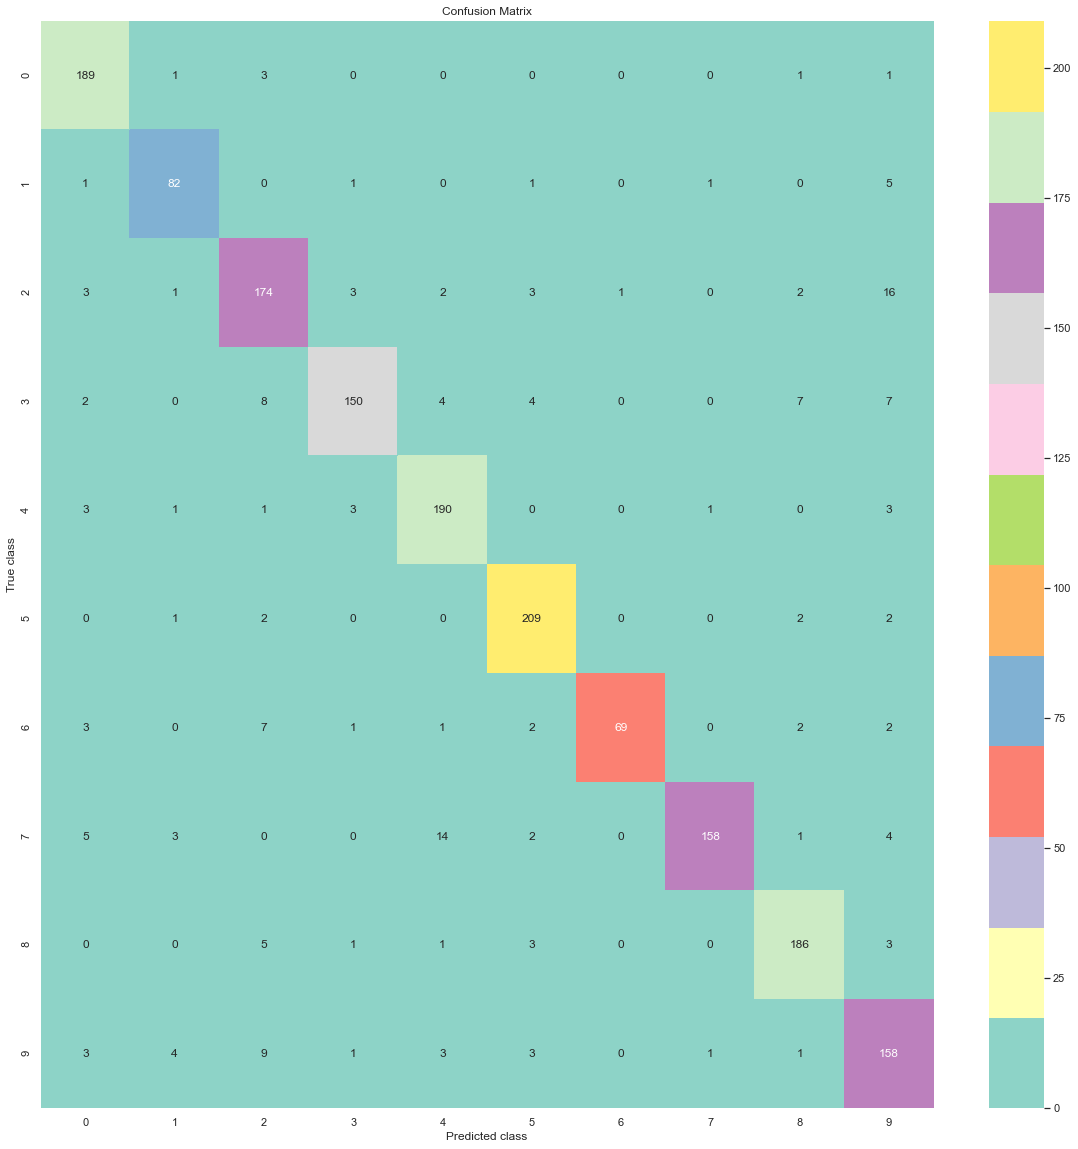

In [36]:
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
cm=confusion_matrix(y_test.argmax(axis=1),round_off.argmax(axis=1))
print("Confusion Matrix")
print(cm)

plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True,fmt="d",cmap='Set3')
plt.title("Confusion Matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

In [37]:
mydict = {'air_conditioner':0, 'car_horn':1, 'children_playing':2, 'dog_bark':3,
       'drilling':4, 'engine_idling':5, 'gun_shot':6, 'jackhammer':7, 'siren':8,
       'street_music':9}
import librosa
audio_file_path="D:\\shravanne-tasks\\Datasets\\UrbanSound8K\\audio\\fold6\\24364-4-0-11.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
mfccs = np.mean(librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40).T,axis=0)
x=[]
x.append(mfccs)
x=np.array(x)
x=np.reshape(x,(x.shape[0],10,4,1))
y_pre=model.predict(x)
y_pre=np.round_(y_pre)
a,b=np.where(y_pre==1)
for gerne, classs in mydict.items(): 
    if classs == b[0]:
        print(gerne)

1/1 [==============================] - 0s 43ms/step
drilling


In [38]:
import IPython.display as ipd

ipd.display(ipd.Audio(audio_file_path))

In [51]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.2,random_state=0)

In [52]:
X_train1=np.reshape(X_train1,(X_train1.shape[0],10,4))
X_test1=np.reshape(X_test1,(X_test1.shape[0],10,4))

In [53]:
input_shape=(10,4)

In [54]:
model = keras.Sequential()

    # 2 LSTM layers
model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
model.add(keras.layers.LSTM(64))

    # dense layer
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))

    # output layer
model.add(keras.layers.Dense(10, activation='softmax'))
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['acc'])

In [62]:
progression = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=150)

Epoch 1/150
219/219 [==============================] - 2s 11ms/step - loss: 0.0154 - acc: 0.9956 - val_loss: 0.9543 - val_acc: 0.8563
Epoch 2/150
219/219 [==============================] - 2s 10ms/step - loss: 0.0164 - acc: 0.9961 - val_loss: 0.9413 - val_acc: 0.8580
Epoch 3/150
219/219 [==============================] - 2s 10ms/step - loss: 0.0221 - acc: 0.9933 - val_loss: 0.9323 - val_acc: 0.8620
Epoch 4/150
219/219 [==============================] - 2s 10ms/step - loss: 0.0251 - acc: 0.9926 - val_loss: 0.9486 - val_acc: 0.8580
Epoch 5/150
219/219 [==============================] - 2s 10ms/step - loss: 0.0188 - acc: 0.9938 - val_loss: 0.9477 - val_acc: 0.8586
Epoch 6/150
219/219 [==============================] - 2s 10ms/step - loss: 0.0173 - acc: 0.9950 - val_loss: 0.9576 - val_acc: 0.8546
Epoch 7/150
219/219 [==============================] - 2s 10ms/step - loss: 0.0142 - acc: 0.9954 - val_loss: 0.9194 - val_acc: 0.8598
Epoch 8/150
219/219 [==============================] - 2s 10ms

In [63]:
test_accuracy1=model.evaluate(X_test1,y_test1,verbose=0)
print(test_accuracy1[1])

0.8603320121765137


In [39]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ril\AppData\Local\Temp\tmphauzggo9\assets


INFO:tensorflow:Assets written to: C:\Users\ril\AppData\Local\Temp\tmphauzggo9\assets
